With an ocean of apps saturating the mobile market it is easy to lose track of all of them. In this dataset, I am hoping to explore trends, and find out which kinds of apps are more likely to be a success. For this we will use an operational definition of a rating 4 higher, and 1,000,000+ downloads.

I want to find out:

Which apps are most popular? 
Which category of app has the most room for improvement? (ie: lowest average rating across its category)
Is there a correlation with number of reviews and success of the app?

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Let's explore the data
df = pd.read_csv(r'C:\Users\Computer\Desktop\School\csv\googleplaystore.csv')
df= df[df.App != 'Life Made WI-Fi Touchscreen Photo Frame']
#This was a dirty row that had nonsensical values in all columns

#Get rid of Nans
rating = df.dropna()

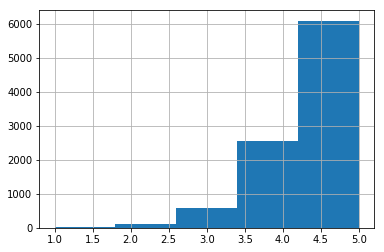

In [0]:
f = rating[['Rating']]
mean = f.mean()

#Looks like our histogram might be left-skewed since the average value is toward the max of 5.
hist = rating['Rating'].hist(bins=5)

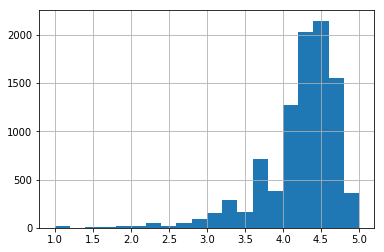

In [0]:
#Let's specify a little more by increasing bins.
hist = rating['Rating'].hist(bins=20)
#Now it appears like a rating of 4 to 5 is still the most popular, but now we get a nicer visual of the spread.
#From this, it looks like users either tend to only rate things that they like, or, conversely,
#apps that only receive lower ratings do not stay alive long. 

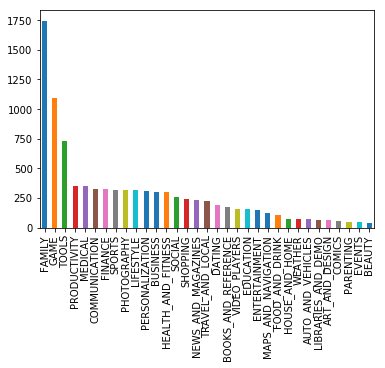

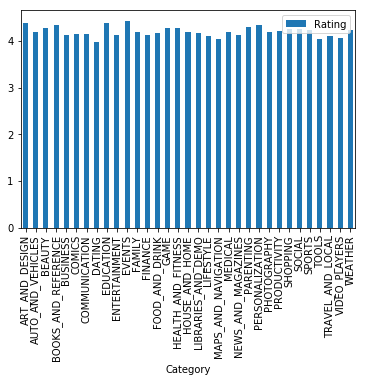

In [0]:
#Let's explore category
rating.Category.value_counts().plot(kind='bar')
rating.Category.value_counts()
#So family, games, tools, and productivity are the most popular genres. But how do their average ratings fare?

rating.groupby(['Category']).describe()
#The mean of the ratings seem close together.
grouped = rating.groupby(['Category']).mean()
mean_by_cat = pd.DataFrame(grouped)
mean_by_cat.plot(kind = 'bar')
#It still looks like it will be harder to distinguish by rating since they seem to gravitate to 4,
#even when grouping by category. The only category that does not have at least a 4 on average is 'Dating'!

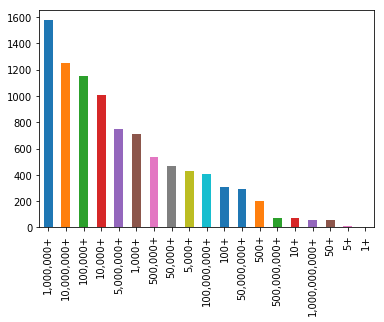

In [0]:
#Let's examine installs
rating.Installs.value_counts().plot(kind='bar')
#Granted, it makes sense that there would be more apps that have a higher number of installs
#since these are the apps that are most likely to stay alive.

#Let's see if there is a trend with the number of installs with what we know about rating.
install = rating[['Installs','Category']]
install_max = install.groupby(['Category']).max()
#From this it seems like our Dating category also has a lower max install value.  We can use this for
#an experiment later.
correlate = rating[['Rating','Reviews']]

0.06813270883720693


C:\Users\Computer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


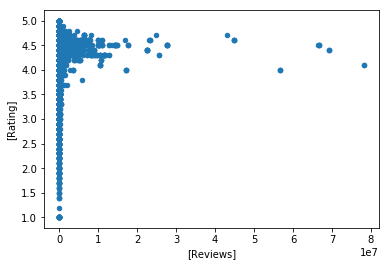

In [0]:
#looks like there is no relationship between these two, but let's graph anyway.
rating['Reviews']=pd.to_numeric(rating['Reviews'], errors='ignore')
print(rating['Rating'].corr(rating['Reviews']))
rating.plot.scatter(['Reviews'], ['Rating'])
#This makes sense, as reviews can go either way, positive or negative. A popularly downloaded app will receive feedback
#from more perspectives, inceasing it's range of reviews.
#All of our data this far has noted the importance of receiving positive ratings, so this is where our experiment will focus.

Let’s create an experiment for a dating app, since this is the category with the most potential to increase ratings.
Let’s see if we can increase the rating for well-known dating app “eHarmony”. This has over a million downloads, and only a 3.1 rating, which is not much lower than the average for its category, so there is definitely leaves room for improvement. Let’s try and help eHarmony out with some more positive reviews. Naturally, the rating will decrease or increase depending on the negativity or positivity of the reviews that the app receives. To increase rating, we need to increase the number of users that provide positive reviews. Users tend to leave reviews based on how they are feeling in that instant, and strongly positive or negative feelings encourage a rating of the users’ own accord. However, let’s try and specifically solicit reviews to work around the intensely negative reviews.
I am wondering if we can target active users who have not rated yet by creating two groups. All users who have not yet given a rating will be randomly assigned to either:
1.	Control Group
a.	This group will view a pop up after 2 minutes of using the app, regardless of the users’ actions, that says: “Enjoying the app? Why not give a rating?”
2.	Experimental Group
a.	This group will be asked to review the app immediately after making a match with another person, that has the same text “Enjoying the app? Why not give a rating?”
The hypothesis here is that the experimental group will leave much higher ratings on average than the control group, since they have a happier emotion that is present while rating the app. Unfortunately, it’s a hard world out there for finding love, and realistically probably fewer than half of users on the site will match with someone, so let’s slightly skew the proportion of the experimental group to account for 60%, and the control group 40%. This is to counter our experimental group being too small to have an effect on the average rating.

How will we know if the experiment was a success?

Since this app has around 31,000 reviews but over five million downloads, it should be safe to say that there is a large potential to double our number of reviews if we roll out an aggressive app review campaign. Since our install/downloads column does not mean that every install is a new user (there will be repeats and not all users are active) let’s be more conservative and say the actual number of people who use the app now is 1 million. Per the math below, even if only 3.2% of users actually rate the app, the review number will double, and since 3.1% of users rated the app of their own accord, our aggressive rating campaign should be able to reach that. 

In [0]:
x = 1000000 - 31000
y = 31000 / 1000000
z = 31000 / x
print(x)
print(y)
print(z)

969000
0.031
0.03199174406604747


Let’s define this campaign a success if, after 6 months, our rating average changes from a 3.1 to a 3.3. If this is the case, then we will adopt the experimental group as the status quo for soliciting ratings from active users. If we cannot reject the null hypothesis that these two groups are different, we will revert to the former method of receiving ratings. 